In [118]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from itertools import chain

In [23]:
padding = 3
with open('names.txt', 'r') as file:
    names = file.readlines()
names = ['.'*padding+name.strip()+'.' for name in names]
names[:3]

['...emma.', '...olivia.', '...ava.']

In [35]:
unique_char = set(list(chain(*names)))
length = len(unique_char)
chtoi = {i:en for en, i in enumerate(sorted(list(unique_char)))}
itoch = {v:k for k,v in chtoi.items()}
length

27

In [111]:
Xs, Ys = [], []
for word in names:
    for c1, c2, c3, c4 in zip(word, word[1:], word[2:], word[3:]):
        Xs.append([chtoi[c1],chtoi[c2],chtoi[c3]])
        Ys.append(chtoi[c4])
Xs = torch.tensor(Xs)
Ys = torch.tensor(Ys)
Xs[:10], Ys[:10], Xs.shape, Ys.shape 

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9]),
 torch.Size([228146, 3]),
 torch.Size([228146]))

In [163]:
embedding_dim = 2
batch_size = 32
hid_dim = [padding*embedding_dim, 100]
g = torch.Generator().manual_seed(12834)
lr = .1
embed = torch.rand((length, embedding_dim), requires_grad=True, generator=g)
print(f'{embed[Xs].shape=}')

W1 = torch.randn(hid_dim[0],hid_dim[1], requires_grad=True, generator=g)
b1 = torch.randn(hid_dim[1], requires_grad=True, generator=g)
W2 = torch.randn(hid_dim[1],length, requires_grad=True, generator=g)
b2 = torch.randn(length, requires_grad=True, generator=g)
parameters = [embed, W1, b1, W2, b2]
print(f'{W1.shape=}, {b1.shape=}, {W2.shape=}, {b2.shape=}')

for i in range(100000):
    batch = torch.randint(0, Xs.shape[0], (batch_size,))
    hidden = torch.tanh(embed[Xs[batch]].view(-1, hid_dim[0]) @ W1 + b1)
    out = hidden @ W2 + b2
    loss = F.cross_entropy(out, torch.tensor(Ys[batch])) 
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data -= lr * p.grad
    if i % 1000 == 0:
        print(f'loss={loss.item()}')
    if  i == 100000:
        lr *= .1
    # if loss.item() < 2:
    #     break
print(f'loss={loss.item()}')

embed[Xs].shape=torch.Size([228146, 3, 2])
W1.shape=torch.Size([6, 100]), b1.shape=torch.Size([100]), W2.shape=torch.Size([100, 27]), b2.shape=torch.Size([27])
loss=10.912996292114258


/tmp/ipykernel_17131/81328525.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = F.cross_entropy(out, torch.tensor(Ys[batch]))


loss=2.621100425720215
loss=2.5659902095794678
loss=2.9085750579833984
loss=2.5764238834381104
loss=2.588291645050049
loss=2.317904472351074
loss=2.070044994354248
loss=2.8235394954681396
loss=2.4984991550445557
loss=2.927107334136963
loss=2.3398032188415527
loss=2.6222920417785645
loss=2.563169002532959
loss=2.355222225189209
loss=2.348522663116455
loss=2.5607635974884033
loss=2.2678492069244385
loss=2.3870880603790283
loss=2.3517651557922363
loss=2.809919834136963
loss=2.5964958667755127
loss=2.446852922439575
loss=2.821650743484497
loss=2.306657552719116
loss=2.2986831665039062
loss=2.0547492504119873
loss=2.2112820148468018
loss=2.223566770553589
loss=2.2287909984588623
loss=2.496208667755127
loss=2.1335299015045166
loss=2.865292549133301
loss=2.6068801879882812
loss=2.4316048622131348
loss=2.48909592628479
loss=2.8906090259552
loss=2.5406980514526367
loss=2.267906665802002
loss=2.0957541465759277
loss=2.3241379261016846
loss=2.24615216255188
loss=2.2558774948120117
loss=2.41743063

In [164]:
embeddings = embed.detach().numpy()
embeddings.shape
embeddings[0,0]

-0.262316

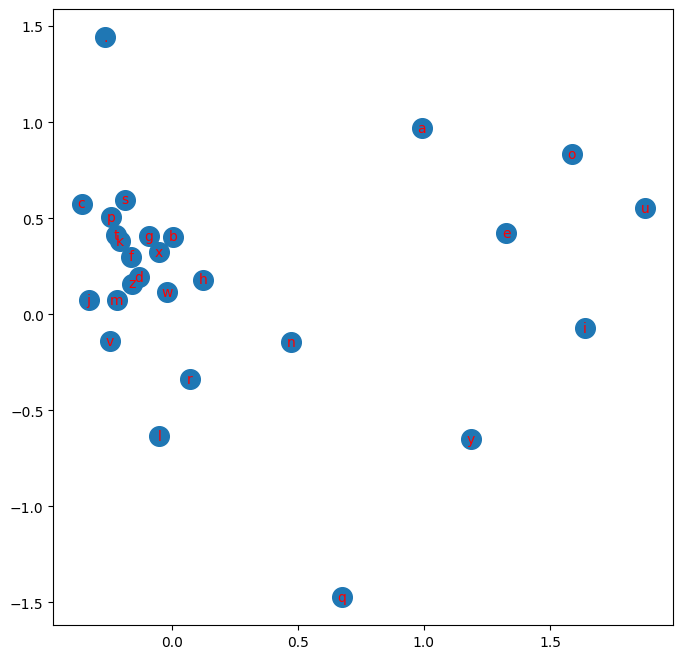

In [165]:
plt.figure(figsize=(8,8))
plt.scatter(embeddings[:,0], embeddings[:,1], s=200)
for i in range(length):
    plt.text(embeddings[i,0], embeddings[i,1], itoch[i], ha='center', va='center', color='red')